### The objective of the program is to perform the following tasks:

Scrape stock data from a specific website, in this case, merolagani.com. 

Structure and organize the scraped data. 

Save the structured data as a CSV file. 

Visualize the data using a pairplot, providing a graphical representation of relationships between different variables in the data.

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the URL to scrape
url = "https://merolagani.com/StockQuote.aspx"

# Send a GET request to the URL and parse the HTML content using BeautifulSoup
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the stock data
table = soup.find_all("table", class_="table table-bordered table-striped table-hover sortable")

# Find the rows containing the stock symbols
table_row = soup.find_all("span")
table_row1 = (table_row[33:41])

# Extract the labels for the data columns
labels = [re.findall(r'>(.*?)<', str(element))[0] for element in table_row1]

# Create a dictionary to store the data
data_dict = {label: [] for label in labels}

# Find the stock symbols and store them in the dictionary
company = soup.find_all("td", class_="text-center")
labels1 = [re.findall(r'>(.*?)<', str(element))[0] for element in company]
filtered_list = [data_dict["Symbol"].append(item) for item in labels1 if item[:1].isalpha()]

# Find the numerical data and store it in the dictionary
td = soup.find_all("td", class_="text-right")
numbers = [float(re.sub(r'[^\d.]', '', str(item))) for item in td]
Symbols = data_dict.pop("Symbol")
for i, value in enumerate(numbers):
    key = list(data_dict.keys())[i % len(data_dict)]
    data_dict[key].append(value)

# Add the stock symbols back to the dictionary
data_dict["Symbol"] = Symbols

# Convert the dictionary to a Pandas DataFrame and save it to a CSV file

df = pd.DataFrame(data_dict)
df.to_csv("merolagi1.csv")
df


,LTP,% Change,High,Low,Open,Qty.,Turnover,Symbol
0,603.8,5.93,603.8,579.0,579.0,2432.0,1448313.3,ACLBSL
1,234.0,0.39,237.1,228.6,233.0,14945.0,3484322.1,ADBL
2,1223.0,1.83,1249.5,1201.0,1225.0,460.0,564626.5,ADLB
3,368.4,0.93,371.9,359.0,365.0,5575.0,2041772.0,AHL
4,295.9,1.04,300.0,291.3,298.0,49991.0,14758653.1,AHPC
...,...,...,...,...,...,...,...,...
95,270.0,1.39,278.0,267.0,268.4,6686.0,1798417.0,KRBL
96,301.0,0.66,305.5,297.0,302.9,15184.0,4554325.5,KSBBL
97,353.0,0.14,356.4,346.7,346.7,18740.0,6586360.5,LBBL
98,181.1,1.25,184.8,181.1,182.1,30202.0,5514906.2,LBL


<Figure size 1000x1000 with 0 Axes>

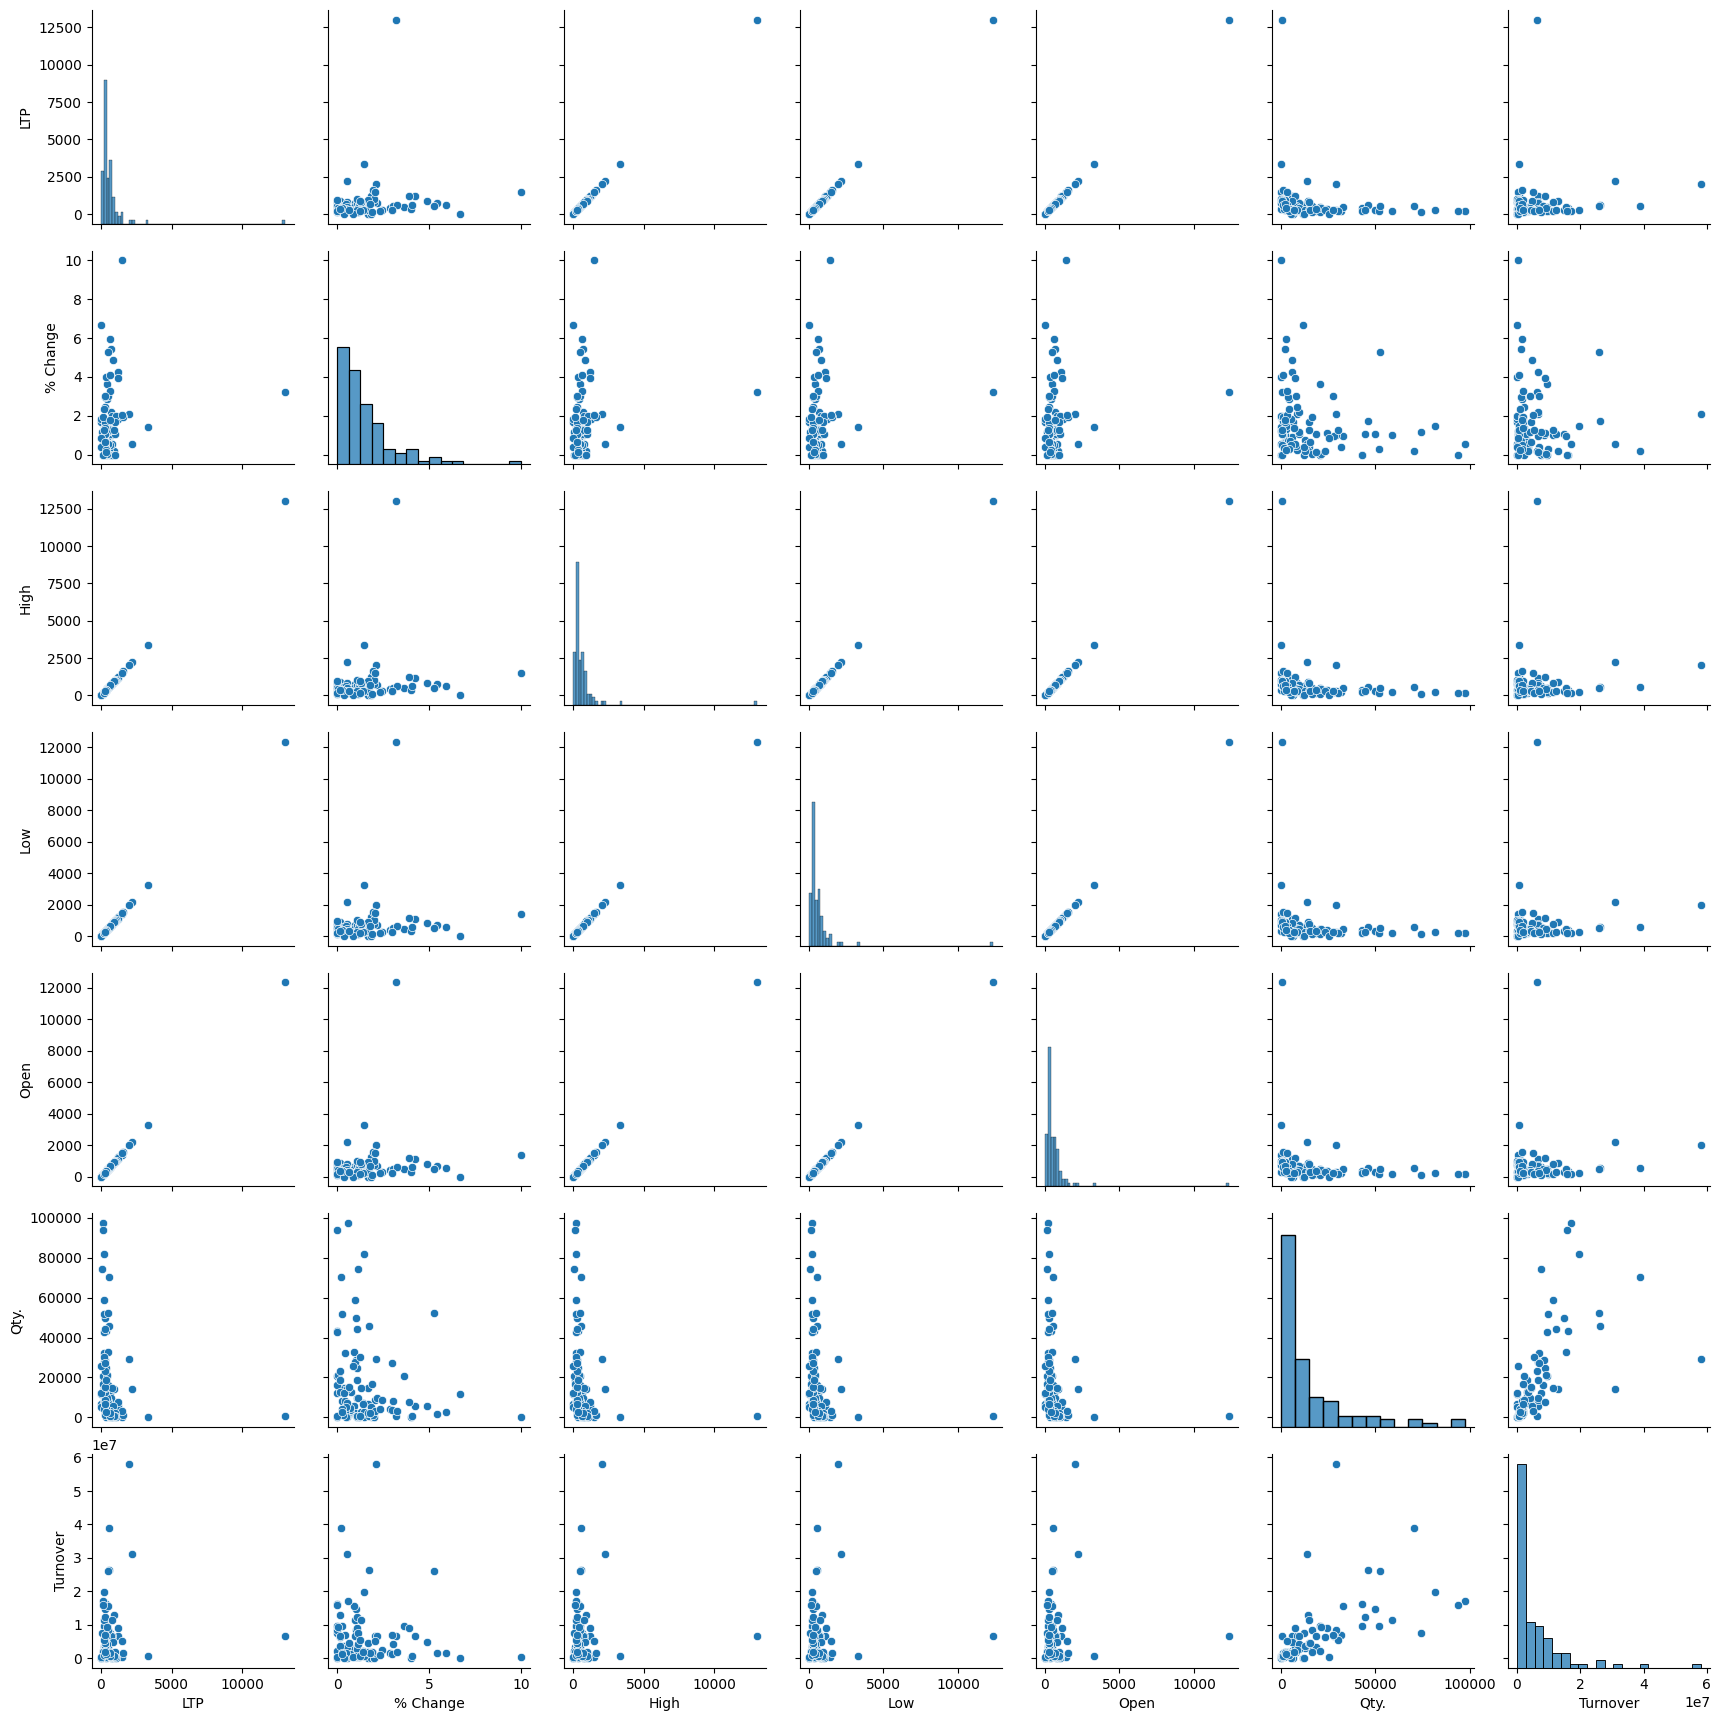

In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("merolagi1.csv",usecols=['LTP', '% Change', 'High', 'Low', 'Open', 'Qty.', 'Turnover', 'Symbol'])

# Visualize the data using a pairplot from Seaborn
plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.show()

#### In conclusion, from the above figure we can analyze the relation between dependencies of difference companies. 